<a href="https://colab.research.google.com/github/shubhamjain02/Graduate-Admission-Predictor/blob/master/Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admission Prediction

---

####**AIM :**

This project aims in helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea (percentage out of 100) about their chances for a particular university.

####**Dataset :**

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1; 1 being 100% )

> Dataset can be downloaded [here](https://www.kaggle.com/mohansacharya/graduate-admissions).


##**Downloading the dataset into your Colab Notebook**

After executing the following code, you will require to upload the Credentials of your Kaggle Account :

1. Open "My Account" in your Kaggle Account.
2. Download the Json file by cliking on "Generate New API Token".
3. Upload the Json file when asked to Upload Files

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"shubhamjain2","key":"3ef63b7776c17bf67410c1bd7c4a87fc"}'}

> Import the Dataset

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
#Importing Data
!kaggle datasets download -d mohansacharya/graduate-admissions
#Unzipping the Files
from zipfile import ZipFile
file_name='graduate-admissions.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


##**Steps of Solution :**

1. Importing the libraries
2. Loading the Dataset.
3. Exploratory Data Analysis
    
    *   Variable Identification
    *   NUll Check
    *   Correlation Analysis.
    *   Graphical Analysis
    *   Outlier Detection.  
4. Splitting the Dataset into Training and Validation Set
5. Applying Regression Models and Prediction of Output.
6. Visualization of Regression Models
6. Comparison of Results

---
###**Step 1: Importing the libraries**

---


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # For splitting data into Training and Validation Set
from sklearn.linear_model import LinearRegression # For Linear Regression
from sklearn.tree import DecisionTreeRegressor # For Decision Tree Model
from sklearn.ensemble import RandomForestRegressor # For Random Forest Model
from sklearn.neighbors import KNeighborsRegressor # For KNN Model
from sklearn.svm import SVR # For Support Vector Model
from sklearn.decomposition import PCA # For data visualization
from xgboost import XGBRegressor # For XBG Model
from sklearn.metrics import mean_squared_error # For calculated Error
from prettytable import PrettyTable # For making Accuracy Table

---
###**Step 2: Loading the Dataset**
---

In [0]:
dataset = pd.read_csv("Admission_Predict.csv")

---
###**Step 3: Exploratory Data Analysis (EDA)**
---


**3.1 Variable Identification**

Using the function
```
dataset.head(), dataset.info()
```
predictor variables, target variable, data type of variables and category of variables are identified.


In [6]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Conclusion :**

1. "Chance of Admit" is the Target Variable.
2. "SOP", "LOR" and "CGPA" are float datatypes; rest of the variables are integer types.
3. Serial No. obviously plays no role in predicting Chance of Admit. So, it needs to be removed.

In [0]:
dataset = dataset.drop(labels="Serial No.", axis = 1)

**3.2 Null Check**

In [9]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Thus, no missing values present

**3.3 Variable Reduction by analysing the Correlation between them.**

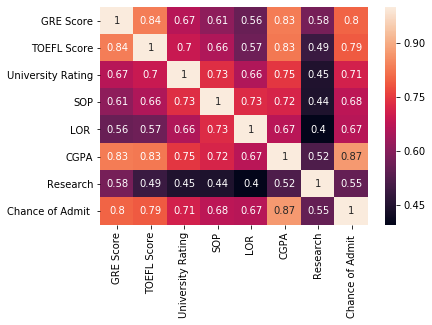

In [10]:
sns.heatmap(dataset.corr(), annot = True)

The conclusions that are made from the above mapping are :

1. GRE Score, TOEFL Score and CGPA are highly correalted, so two of them need to be removed from the dataset.  
2. Research has very less correlation with Chance of Admit. It implies that, if needed it can be removed but in this dataset there are only a few independent variables , we will not remove "Research".

Hence , we will see relations and impact of GRE Score, TOEFL Score and CGPA on Chance of admit. 

>**Note 1**

Correlation Factor w.r.t Chance of Admit of 
1. CGPA = 0.87
2. GRE Score = 0.8
3. TOEFL Score = 0.79


**3.4 Graphical Analysis**

Graphical analysis is as follows : 



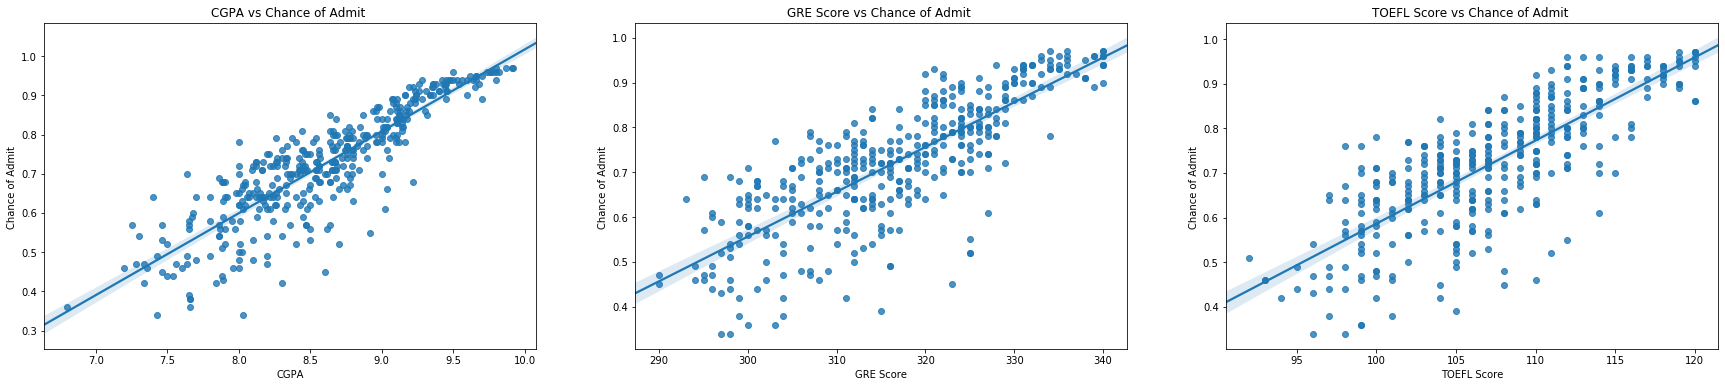

In [11]:
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
sns.regplot(dataset['CGPA'], dataset['Chance of Admit '])
plt.title('CGPA vs Chance of Admit ')

plt.subplot(1,3,2)
sns.regplot(dataset['GRE Score'], dataset['Chance of Admit '])
plt.title('GRE Score vs Chance of Admit ')

plt.subplot(1,3,3)
sns.regplot(dataset['TOEFL Score'], dataset['Chance of Admit '])
plt.title('TOEFL Score vs Chance of Admit ')

print("Graphical analysis is as follows : \n")

As it appears that applicants CGPA has a strongest effect on Chance of Admit, So we cannot remove CGPA from the dataset.

Thus, also looking mathematically (Note 1) , we will drop "GRE Score" and "TOEFL Score".


In [0]:
df = dataset.drop("GRE Score", axis =1)
df = df.drop("TOEFL Score", axis =1)

In [13]:
df

,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,4,4.5,4.5,9.65,1,0.92
1,4,4.0,4.5,8.87,1,0.76
2,3,3.0,3.5,8.00,1,0.72
3,3,3.5,2.5,8.67,1,0.80
4,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...
395,3,3.5,3.5,9.04,1,0.82
396,3,3.0,3.5,9.11,1,0.84
397,4,5.0,4.5,9.45,1,0.91
398,3,3.5,4.0,8.78,0,0.67


**3.5 Outlier Detection**

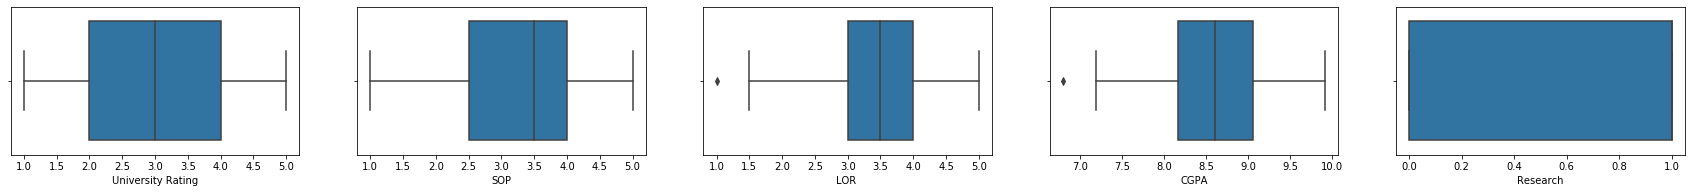

In [14]:
plt.figure(figsize=(30, 6))
plt.subplot(2,5,1)
sns.boxplot(x=df['University Rating'])

plt.subplot(2,5,2)
sns.boxplot(x=df['SOP'])

plt.subplot(2,5,3)
sns.boxplot(x=df['LOR '])

plt.subplot(2,5,4)
sns.boxplot(x=df['CGPA'])

plt.subplot(2,5,5)
sns.boxplot(x=df['Research'])

**Conclusion :**

There is negligible outlier present in the model. So we can now proceed to our model.

---
###**Step 4: Splitting Data into Training and Validation Set**
---


In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state =0)

---
###**Step 5: Building and Applying Regression Models**
---

We will apply many regression models from simplest Linear Regression to the complex XGB Regression and compare their accuracies.

**5.1 Linear Regression**

It is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). Here, as the variables are 5 , it is case of **Multiple Linear Regression**.

In [0]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_linear = reg_linear.predict(X_valid)

**5.2 Decision Tree Regression**

Decision tree builds regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [0]:
reg_decisiontree = DecisionTreeRegressor()
reg_decisiontree.fit(X_train, y_train)
y_pred_decisiontree = reg_decisiontree.predict(X_valid)

**5.3 Random Forest Regression**

Random forests or random decision forests are an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mean prediction (for regression) of the individual trees.

> Random decision forests correct for decision trees habit of overfitting to their training set.

In [18]:
reg_randomforest = RandomForestRegressor()
reg_randomforest.fit(X_train, y_train)
y_pred_randomforest = reg_randomforest.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**5.4 K-Nearest Neighbors**

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions).

n_neighbors = Number of neighbors to use , usual choice is 10

In [0]:
reg_knn = KNeighborsRegressor(n_neighbors=10)
reg_knn.fit(X_train, y_train)
y_pred_knn = reg_knn.predict(X_valid)

**5.5 Support Vector Regression**

In Simple Regression we try to minimise the error rate, while in SVR we try to fit the error within a certain threshold.
 
The most used type of kernel function is RBF because it has localized and finite response along the entire x-axis. So, The kernal used here is **RBF** i.e., default value.

In [20]:
reg_svr = SVR()
reg_svr.fit(X_train, y_train)
y_pred_svr = reg_svr.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**5.6 XGB Regression**

XGBoost stands for eXtreme Gradient Boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are:

1. Execution Speed.
2. Model Performance.

In [21]:
reg_xgb = XGBRegressor()
reg_xgb.fit(X_train, y_train)
y_pred_xgb = reg_xgb.predict(X_valid)

[10:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


---
###**Step 6 Visualizing Results**

---


To visualize the Scatter plots of **y** with respect to **X**, both X and y must be of same size. But X has a shape of (400,5) while y has a shape of (400,1).

> So, we can use Principal Component Analysis (PCA) for visualization.

Applying PCA on **X** with **n_component=1** , will convert X from (400,5) to (400,1). 

Here some data is lost in X.

But the lost data does not effect the Output as we have already predicted the **y** using X as (400,5) matrix only.

In [0]:
pca = PCA(n_components=1)
X_valid_new = pca.fit_transform(X_valid)

> By this conversion of X , we can thus visualise "y_valid" and "y_predicted" as follows. 

Scatter Plot for x_valid v/s y_valid( in Red) and y_prediction (in Green) 
 


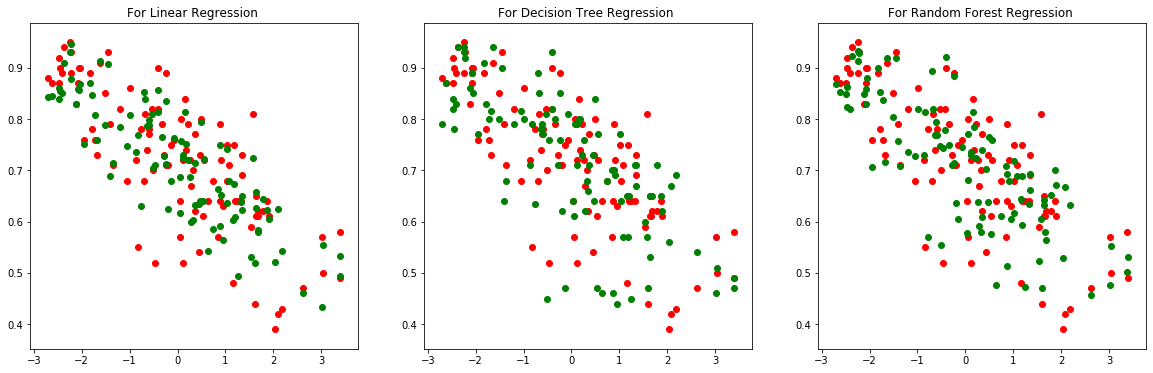

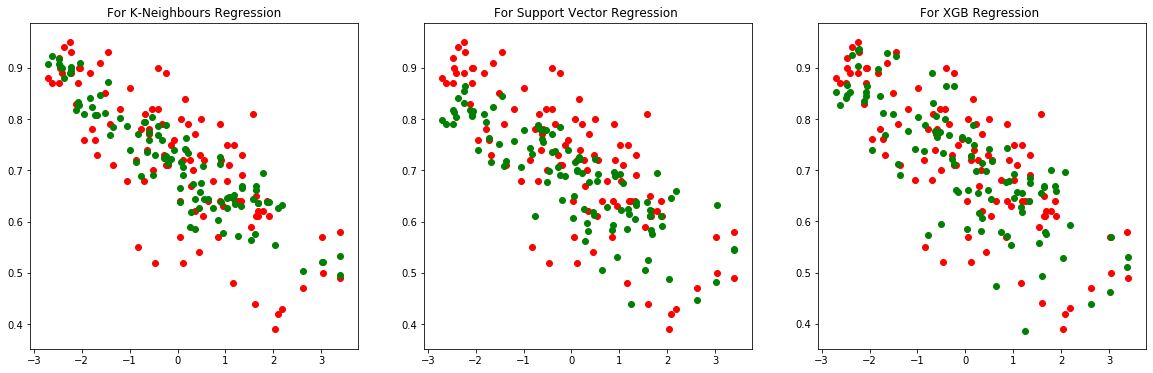

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_linear, color = "green")
plt.title('For Linear Regression ')

plt.subplot(1,3,2)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_decisiontree, color = "green")
plt.title('For Decision Tree Regression ')

plt.subplot(1,3,3)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_randomforest, color = "green")
plt.title('For Random Forest Regression ')

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_knn, color = "green")
plt.title('For K-Neighbours Regression')

plt.subplot(1,3,2)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_svr, color = "green")
plt.title('For Support Vector Regression ')

plt.subplot(1,3,3)
plt.scatter(X_valid_new, y_valid, color = "red")
plt.scatter(X_valid_new, y_pred_xgb, color = "green")
plt.title('For XGB Regression ')

print("Scatter Plot for x_valid v/s y_valid( in Red) and y_prediction (in Green) \n ")

---
###**Step 7 Accuracy Calculation**
---

In [0]:
error_linear = np.sqrt(mean_squared_error(y_valid,y_pred_linear))
accuracy_linear = (1-error_linear)*100
error_decisiontree = np.sqrt(mean_squared_error(y_valid,y_pred_decisiontree))
accuracy_decisiontree = (1-error_decisiontree)*100
error_randomforest = np.sqrt(mean_squared_error(y_valid,y_pred_randomforest))
accuracy_randomforest = (1-error_randomforest)*100
error_knn = np.sqrt(mean_squared_error(y_valid,y_pred_knn))
accuracy_knn = (1-error_knn)*100
error_svr = np.sqrt(mean_squared_error(y_valid,y_pred_svr))
accuracy_svr = (1-error_svr)*100
error_xgb = np.sqrt(mean_squared_error(y_valid,y_pred_xgb))
accuracy_xgb = (1-error_xgb)*100

In [25]:
t = PrettyTable(['Name', 'Accuracy'])
t.add_row(['Linear Regression', accuracy_linear])
t.add_row(['Decision Tree Regression', accuracy_decisiontree])
t.add_row(['Random Forest Regression', accuracy_randomforest])
t.add_row(['K-Neighours Regression', accuracy_knn])
t.add_row(['Support Vector Regression', accuracy_svr])
t.add_row(['XGB Regression', accuracy_xgb])
print(t)

+---------------------------+-------------------+
|            Name           |      Accuracy     |
+---------------------------+-------------------+
|     Linear Regression     | 92.76227853521704 |
|  Decision Tree Regression | 89.56699947282662 |
|  Random Forest Regression | 91.02788625796575 |
|   K-Neighours Regression  | 92.08834404185824 |
| Support Vector Regression | 91.18192107130871 |
|       XGB Regression      | 91.35739240856864 |
+---------------------------+-------------------+


#**Conclusions and Learning:**

1. Simplest Model **Linear Regression** gives the maximum accuracy.
2. If two Independent variables have a high correlation , then first check their correlation with the Target variable, i.e., do not directly eliminate one of the independent variable because it is possible that this variable is the most important feature.
